<h1> 2.Words as Features - EMOTION </h2>

<p> AUTHORS: </p>

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,classification_report

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import plot_confusion_matrix

import gzip
import json
import collections
# jsonfiledirectory = "/Users/rosiers/Documents/GitHub/472-assignment1/goemotions.json.gz"
jsonfiledirectory = "C:\\Users\\Krish\\.vscode\\472-assignment1\\goemotions.json.gz"
# jsonfiledirectory = "C:\\Users\\p_ishna\\Downloads\\goemotions.json.gz"

with gzip.open(jsonfiledirectory, "r") as f:
    data = json.loads(f.read().decode("utf-8"))

<h3> Size of the vocabulary </h3>

In [4]:
strings = []
emotion = []
for item in data:
    strings.append(item[0])
    emotion.append(item[1])

vectorizer = CountVectorizer()
# vectorizer.fit(strings)
# print(vectorizer.vocabulary_)
# tokenize and build vocab
v_fit = vectorizer.fit_transform(strings)
#v_fit = vectorizer.transform(strings)

print(v_fit.shape)


(171820, 30449)


<h3>2.2 Split Dataset </h3>

In [5]:
# Comment out depending on which classification you are running

# EMOTIONS
X_train, X_test, y_train, y_test = train_test_split(v_fit, emotion, test_size=0.2)

<h3>2.3 Classifiers - EMOTIONS</h3>

<h4> BASE-MNB <h4>

In [6]:
em_base_mnb = MultinomialNB()
em_base_mnb.fit(X_train,y_train)
print("Base-MNB: ")
print(em_base_mnb.score(X_test,y_test))

Base-MNB: 
0.38499592596903737


<h4>BASE-DT</h4>

In [37]:
em_dtc = DecisionTreeClassifier()
em_dtc.fit(X_train, y_train)
print("Base-DT: ")
print(em_dtc.score(X_test, y_test))

Base-DT: 
0.3572052147596322


<h4>BASE-MLP</H4>

In [40]:
em_p = MLPClassifier(max_iter=1)
em_p.fit(X_train,y_train)
print("Base-MLP: ")
print(em_p.score(X_test,y_test))

Base-MLP: 
0.43883133511814687


C:\Users\Krish\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


<h4>TOP-MNB<H4>

In [46]:
em_nb = MultinomialNB()
params_nb = {
    "alpha" : [0.0, 0.5, 1.0, 100.0]
}

em_nb_grid = GridSearchCV(em_nb, params_nb)
em_nb_grid.fit(X_train, y_train)
print("TOP-MNB: ")
print(em_nb_grid.score(X_test, y_test))
print("Paramaters")
print(em_nb_grid.best_params_)


C:\Users\Krish\AppData\Roaming\Python\Python310\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\Krish\AppData\Roaming\Python\Python310\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\Krish\AppData\Roaming\Python\Python310\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\Krish\AppData\Roaming\Python\Python310\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\Krish\AppData\Roaming\Python\Python310\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


TOP-MNB: 
0.39154347573041554
Paramaters
{'alpha': 0.5}


<h4>TOP-DT<H4>

In [48]:
em_tdt = DecisionTreeClassifier()

params_dt = {
    "criterion" : ['gini','entropy'],
    "max_depth" : [2,10],
    "min_samples_split" : [2,10,40]
}
em_dt_grid = GridSearchCV(
    estimator=em_tdt,
    param_grid= params_dt
)
em_dt_grid = em_dt_grid.fit(X_train, y_train)
print("TOP-DT: ")
print(em_dt_grid.score(X_test, y_test))
print("Paramaters")
print(em_dt_grid.best_params_)

TOP-DT: 
0.3944534978465836
Paramaters
{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 40}


<h4>TOP-MLP<H4>

In [54]:
em_mlp = MLPClassifier(max_iter=1)

params_mlp = {
    'activation' : ['sigmoid', 'tanh', 'relu', 'identity'],
    'hidden_layer_sizes': [(10,10,10), (30,50)],
    'solver': ['sgd', 'adam'] 
}

em_mlp_grid = GridSearchCV(em_mlp,params_mlp,n_jobs=-1)
em_mlp_grid.fit(X_train, y_train)
print("TOP-MLP: ")
print(em_mlp_grid.score(X_test, y_test))
print("Paramaters")
print(em_dt_grid.best_params_)

C:\Users\Krish\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Krish\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Krish\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 762, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\Krish\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_net

TOP-MLP: 
0.4327493888953556
Paramaters
{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 40}


C:\Users\Krish\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


<H3>2.4 Classification Reports</h3>

<h4>Base-MNB - EMOTION</h4>

C:\Users\Krish\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


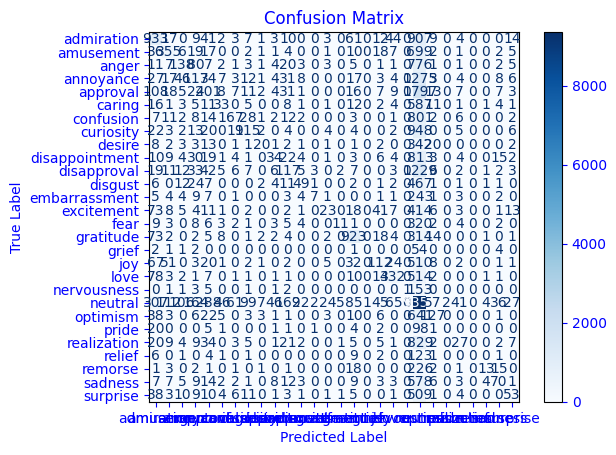

C:\Users\Krish\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Krish\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

    admiration       0.48      0.45      0.46      2080
     amusement       0.54      0.30      0.38      1186
         anger       0.37      0.13      0.19      1072
     annoyance       0.20      0.07      0.11      1627
      approval       0.23      0.09      0.13      2279
        caring       0.25      0.05      0.08       707
     confusion       0.36      0.07      0.12       970
     curiosity       0.36      0.10      0.15      1169
        desire       0.44      0.05      0.09       423
disappointment       0.27      0.03      0.06       989
   disapproval       0.23      0.08      0.12      1521
       disgust       0.44      0.08      0.14       592
 embarrassment       0.50      0.02      0.05       296
    excitement       0.32      0.04      0.07       633
          fear       0.55      0.03      0.05       384
     gratitude       0.73      0.67      0.70      1376
         grief       0.00      0.00      0.00  

C:\Users\Krish\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
mnb_em_pred = em_base_mnb.predict(X_test)
em_cm_mnb = confusion_matrix(y_test, mnb_em_pred)

color = 'blue'
matrix = plot_confusion_matrix(em_base_mnb, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

# with open ('performance.txt', 'w') as f: 
#     f.write("MODEL: base-MNB || PARAMS: none || TASK: emotion")
#     f.write('\n')
#     f.write("CONFUSION MATRIX")
#     f.write('\n')
#     # for i in em_cm_mnb:
#     #     np.savetxt(f, i)
#     em_nb_content = str(em_cm_mnb)
#     f.write(em_nb_content)
#     f.write('\n')
#     f.write('\n')
#     f.write('CLASSIFICATION REPORT')
#     f.write('\n')
#     f.write(classification_report(y_test, mnb_em_pred))
#     f.write('\n')

print(classification_report(y_test, mnb_em_pred))


<h4>BASE-DT - EMOTION</h4>

C:\Users\Krish\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


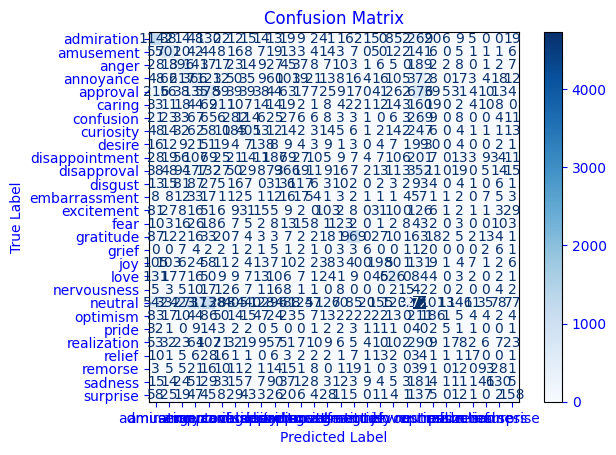

In [38]:
dt_em_pred = em_dtc.predict(X_test)
em_cm_dt = confusion_matrix(y_test, dt_em_pred)

color = 'blue'
matrix = plot_confusion_matrix(em_dtc, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

# with open ('performance.txt', 'a') as f: 
#     f.write("MODEL: base-DT || PARAMS: none || TASK: emotion")
#     f.write('\n')
#     f.write("CONFUSION MATRIX")
#     f.write('\n')
#     # for i in em_cm_mnb:
#     #     np.savetxt(f, i)
#     em_dt_content = str(em_cm_dt)
#     f.write(em_dt_content)
#     f.write('\n')
#     f.write('\n')
#     f.write('CLASSIFICATION REPORT')
#     f.write('\n')
#     f.write(classification_report(y_test, dt_em_pred))
#     f.write('\n')

print(classification_report(y_test, dt_em_pred))

<h4>Base-MLP - EMOTION</h4>

C:\Users\Krish\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


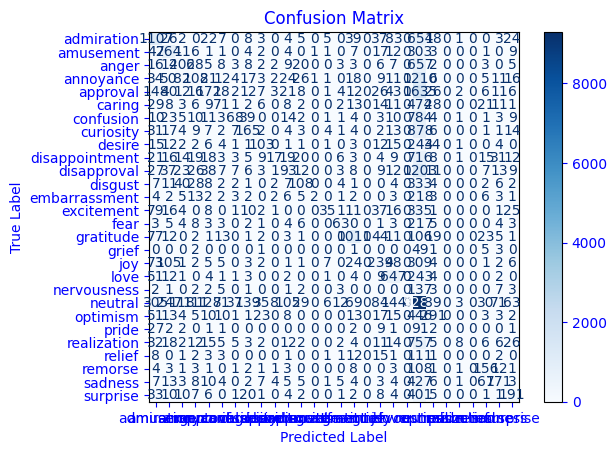

C:\Users\Krish\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Krish\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Krish\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [51]:
mlp_em_pred = em_p.predict(X_test)
em_cm_mlp = confusion_matrix(y_test, mlp_em_pred)

color = 'blue'
matrix = plot_confusion_matrix(em_p, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

# with open ('performance.txt', 'a') as f: 
#     f.write("MODEL: base-MLP || PARAMS: none || TASK: emotion")
#     f.write('\n')
#     f.write("CONFUSION MATRIX")
#     f.write('\n')
#     # for i in em_cm_mnb:
#     #     np.savetxt(f, i)
#     em_mlp_content = str(em_cm_mlp)
#     f.write(em_mlp_content)
#     f.write('\n')
#     f.write('\n')
#     f.write('CLASSIFICATION REPORT')
#     f.write('\n')
#     f.write(classification_report(y_test, mlp_em_pred))
#     f.write('\n')

print(classification_report(y_test, mlp_em_pred))

<h4>TOP-MNB - EMOTION</h4>

C:\Users\Krish\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


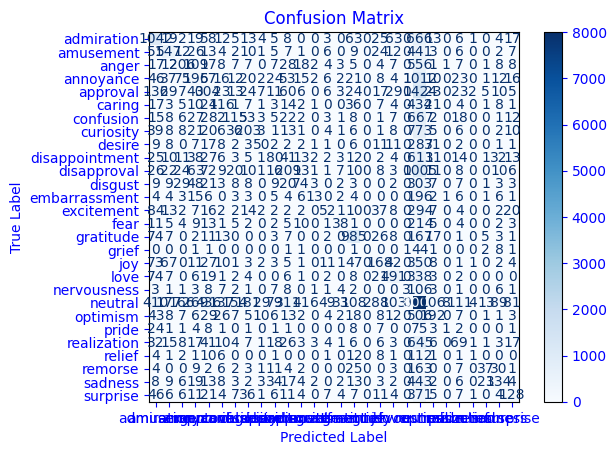

In [52]:
tnb_em_pred = em_nb_grid.predict(X_test)
em_cm_tnb = confusion_matrix(y_test, tnb_em_pred)

color = 'blue'
matrix = plot_confusion_matrix(em_nb_grid, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

# with open ('performance.txt', 'a') as f: 
#     f.write("MODEL: top-MNB || PARAMS: {'alpha': 0.5} || TASK: emotion")
#     f.write('\n')
#     f.write("CONFUSION MATRIX")
#     f.write('\n')
#     em_tnb_content = str(em_cm_tnb)
#     f.write(em_tnb_content)
#     f.write('\n')
#     f.write('\n')
#     f.write('CLASSIFICATION REPORT')
#     f.write('\n')
#     f.write(classification_report(y_test, tnb_em_pred))
#     f.write('\n')

print(classification_report(y_test, tnb_em_pred)) 

<h4>TOP-DT - EMOTION</h4>

C:\Users\Krish\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


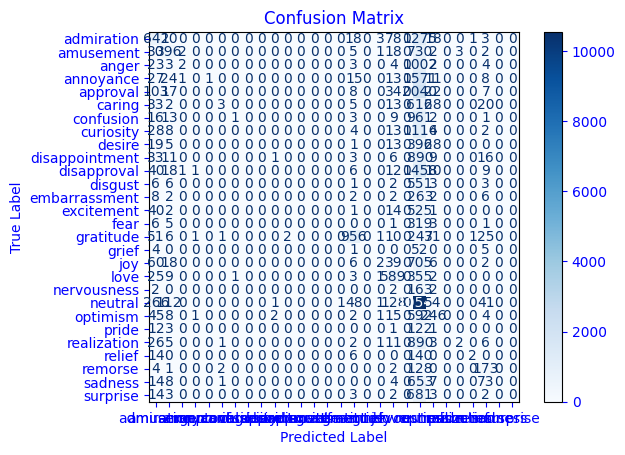

C:\Users\Krish\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Krish\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Krish\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [53]:
tdt_em_pred = em_dt_grid.predict(X_test)
em_cm_tdt = confusion_matrix(y_test, tdt_em_pred)

color = 'blue'
matrix = plot_confusion_matrix(em_dt_grid, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

# with open ('performance.txt', 'a') as f: 
#     f.write("MODEL: top-DT || PARAMS: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 40} || TASK: emotion")
#     f.write('\n')
#     f.write("CONFUSION MATRIX")
#     f.write('\n')
#     em_tdt_content = str(em_cm_tdt)
#     f.write(em_tdt_content)
#     f.write('\n')
#     f.write('\n')
#     f.write('CLASSIFICATION REPORT')
#     f.write('\n')
#     f.write(classification_report(y_test, tdt_em_pred))
#     f.write('\n')

print(classification_report(y_test, tdt_em_pred))

<h4>TOP-MLP - EMOTION</h4>

C:\Users\Krish\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


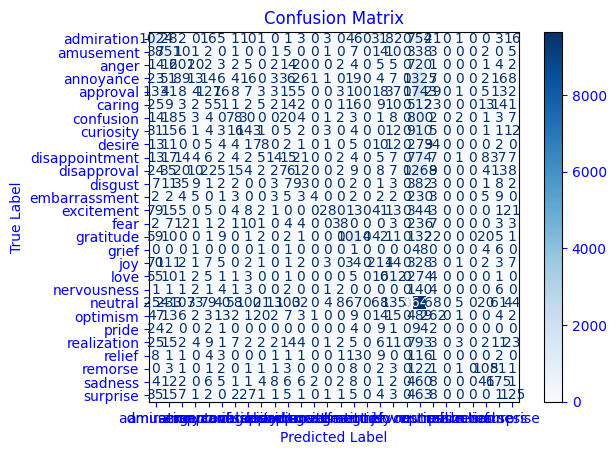

C:\Users\Krish\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Krish\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Krish\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [55]:
tmlp_em_pred = em_mlp_grid.predict(X_test)
em_cm_tmlp = confusion_matrix(y_test, tmlp_em_pred)

color = 'blue'
matrix = plot_confusion_matrix(em_mlp_grid, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

# with open ('performance.txt', 'a') as f: 
#     f.write("MODEL: top-MLP || PARAMS: ? || TASK: emotion")
#     f.write('\n')
#     f.write("CONFUSION MATRIX")
#     f.write('\n')
#     em_tmlp_content = str(em_cm_tmlp)
#     f.write(em_tmlp_content)
#     f.write('\n')
#     f.write('\n')
#     f.write('CLASSIFICATION REPORT')
#     f.write('\n')
#     f.write(classification_report(y_test, tmlp_em_pred))
#     f.write('\n')

print(classification_report(y_test, tmlp_em_pred))

<h3>2.5 Own Exploration</h3>

Use tf-idf instead of word frequencies and redo all substeps of 2.3 above – you can use TfidfTransformer for this. Display the results of this experiment.

In [24]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tvectorizer = TfidfVectorizer()
# tokenize and build vocab
v_fit = tvectorizer.fit_transform(strings)
X_train, X_test, y_train, y_test = train_test_split(v_fit, emotion, test_size=0.2)

In [25]:
sent_base_mnb = MultinomialNB()
sent_base_mnb.fit(X_train,y_train)
print("Base-MNP: ")
print(sent_base_mnb.score(X_test,y_test))

Base-MNP: 
0.3455360260737982


In [26]:
sent_dtc = DecisionTreeClassifier()
sent_dtc.fit(X_train, y_train)
print("Base-DT: ")
print(sent_dtc.score(X_test, y_test))

Base-DT: 
0.35729251542311724


In [27]:
sent_p = MLPClassifier(max_iter=2)
sent_p.fit(X_train,y_train)
print("Base-MLP: ")
print(sent_p.score(X_test,y_test))

Base-MLP: 
0.443196368292399


/Users/rosiers/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(


In [29]:
sent_nb = MultinomialNB()
params_nb = {
    "alpha" : [0.0, 0.5, 10.0, 20.0]
}

sent_nb_grid = GridSearchCV(sent_nb, params_nb)
sent_nb_grid.fit(X_train, y_train)
print('best parameters:')
print(sent_nb_grid.best_params_)
print("TOP-MNB: ")
print(sent_nb_grid.score(X_test, y_test))

/Users/rosiers/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/rosiers/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/rosiers/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/rosiers/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/rosiers/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in nu

best parameters:
{'alpha': 0.0}
TOP-MNB: 
0.38610173437318124


/Users/rosiers/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


In [30]:
sent_tdt = DecisionTreeClassifier()

params_dt = {
    "criterion" : ['gini','entropy'],
    "max_depth" : [2,10],
    "min_samples_split" : [2,10,40]
}
sent_dt_grid = GridSearchCV(
    estimator=sent_tdt,
    param_grid= params_dt
)
sent_dt_grid = sent_dt_grid.fit(X_train, y_train)
print('best parameters:')
print(sent_dt_grid.best_params_)
print("TOP-DT: ")
print(sent_dt_grid.score(X_test, y_test))

best parameters:
{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}
TOP-DT: 
0.39439529740426027


In [31]:
sent_mlp = MLPClassifier(max_iter=1)

params_mlp = {
    'activation' : ['sigmoid', 'tanh', 'relu', 'identity'],
    'hidden_layer_sizes': [(10,10,10), (30,50)],
    'solver': ['sgd', 'adam']
}

sent_mlp_grid = GridSearchCV(sent_mlp,params_mlp,n_jobs=-1)
sent_mlp_grid.fit(X_train, y_train)
print('best parameters:')
print(sent_mlp_grid.best_params_)
print("TOP-MLP: ")
print(sent_mlp_grid.score(X_test, y_test))

/Users/rosiers/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/rosiers/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/rosiers/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 762, in fit
    return self._fit(X, y, incremental=False)
  File "/Users/rosiers/Libra

best parameters:
{'activation': 'identity', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}
TOP-MLP: 
0.4250378302875102


/Users/rosiers/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
